# Assignment 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fft(xlow, xhigh, barwidth = 0.2):
    N = 300
    T = 1/N

    x = np.linspace(xlow, xhigh, N, endpoint = False)

    y = 4.0*np.sin(3.0*np.pi*x/9) - 2.0*np.sin(2.0*np.pi*x/7)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches([9,5])
    ax[0].plot(x,y)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    amp = abs(np.fft.fft(y))[:N//2]
    freq = np.fft.fftfreq(N,T)[:N//2]

    ax[1].bar(freq, 2*amp/N, width = barwidth)
    ax[1].plot(freq, 2*amp/N, '*r')
    ax[1].set_xlabel('frequency')
    ax[1].set_ylabel('amplitude')
    ax[1].set_xlim(0,30)

    return

## Appropriate amount of intervals

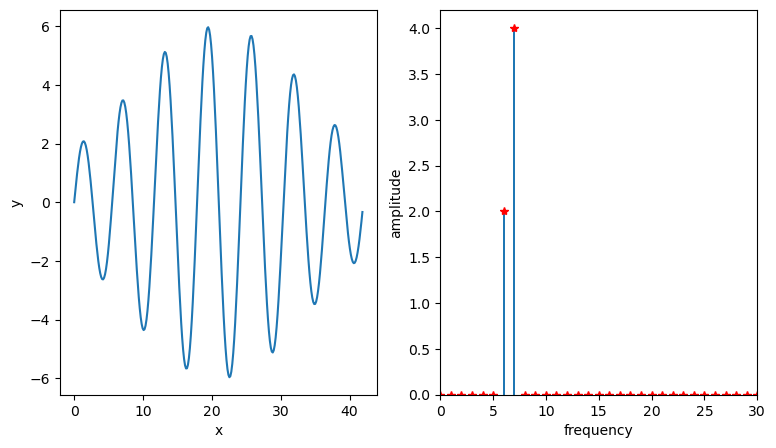

In [4]:
l = fft(0, 42, barwidth = 0.2)

## Inappropriate amount of intervals

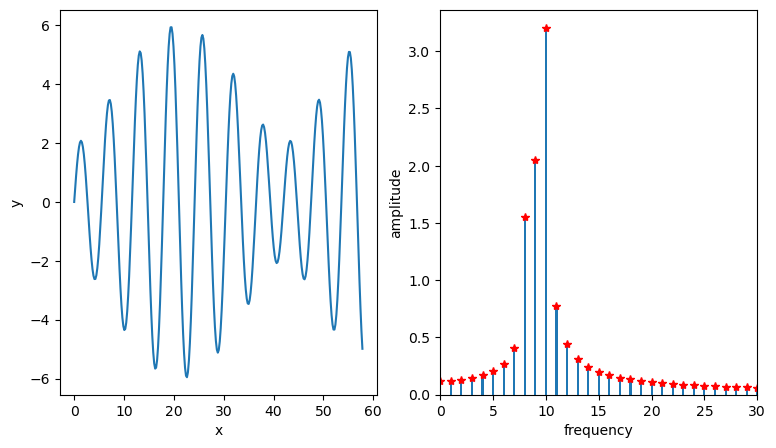

In [27]:
l = fft(0, 58, barwidth = 0.2)

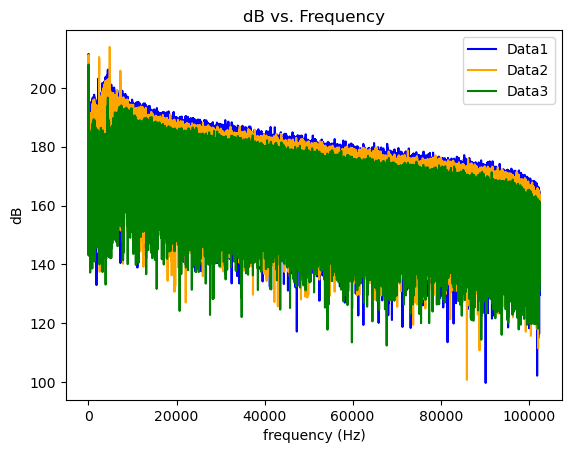

In [5]:
data1 = np.genfromtxt("CupData1.dat", delimiter = ",")[:,4]
data2 = np.genfromtxt("CupData2.dat", delimiter = ",")[:,4]
data3 = np.genfromtxt("CupData3.dat", delimiter = ",")[:,4]

N = 1024000

T = 1/(N/5)

tf = np.fft.fftfreq(N,T)[:N//2]

pf1 = abs(np.fft.fft(data1)[:N//2])
pf2 = abs(np.fft.fft(data2)[:N//2])
pf3 = abs(np.fft.fft(data3)[:N//2])

mag1 = (2/N)*np.abs(pf1)
mag2 = (2/N)*np.abs(pf2)
mag3 = (2/N)*np.abs(pf3)

p0 = 2.0*(10**-5)

plt.plot(tf, 20.0*np.log10(pf1[:N//2]/p0),color='b')
plt.plot(tf, 20.0*np.log10(pf2[:N//2]/p0),color='orange')
plt.plot(tf, 20.0*np.log10(pf3[:N//2]/p0),color='g')
plt.legend(('Data1','Data2','Data3'))
plt.xlabel('frequency (Hz)')
plt.ylabel('dB')
plt.title('dB vs. Frequency')

plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9692\3276643122.py:32: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(tf, 20.0*np.log10(marray[:, 0][:N//2]/p0), label='data1')
C:\Users\Owner\AppData\Local\Temp\ipykernel_9692\3276643122.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(tf, 20.0*np.log10(marray[:, 1][:N//2]/p0), label='data2')
C:\Users\Owner\AppData\Local\Temp\ipykernel_9692\3276643122.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(tf, 20.0*np.log10(marray[:, 2][:N//2]/p0), label='data3')


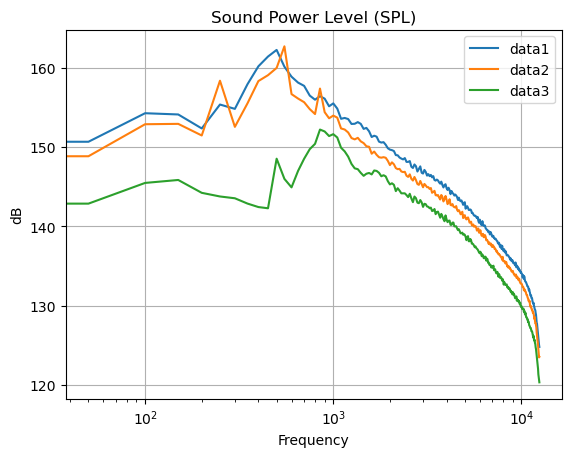

In [24]:
N = 4096
p0 = 2.0e-5
T = 1/204800

tf = np.fft.fftfreq(N, T)[:N//2]  # Only positive frequencies

b = np.zeros((250, 3))

data1 = np.array_split(pf1, 250)
data2 = np.array_split(pf2, 250)
data3 = np.array_split(pf3, 250)

marray = np.zeros((N//2, 3))  # Adjusted size

for i in range(250):
    pf_1 = abs(np.fft.fft(data1[i]))
    pf_2 = abs(np.fft.fft(data2[i]))
    pf_3 = abs(np.fft.fft(data3[i]))

    pf_1 = (2/N) * np.abs(pf_1)
    pf_2 = (2/N) * np.abs(pf_2)
    pf_3 = (2/N) * np.abs(pf_3)

    pf_1 = np.sqrt(np.sum(pf_1**2)/len(pf_1))
    pf_2 = np.sqrt(np.sum(pf_2**2)/len(pf_2))
    pf_3 = np.sqrt(np.sum(pf_3**2)/len(pf_3))

    marray[i, 0] = pf_1
    marray[i, 1] = pf_2
    marray[i, 2] = pf_3

plt.semilogx(tf, 20.0*np.log10(marray[:, 0][:N//2]/p0), label='data1')
plt.semilogx(tf, 20.0*np.log10(marray[:, 1][:N//2]/p0), label='data2')
plt.semilogx(tf, 20.0*np.log10(marray[:, 2][:N//2]/p0), label='data3')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Sound Power Level (SPL)')
plt.grid(True)
plt.show()